In [618]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Problem 1

In [13]:
df=pd.read_csv('bank_marketing_part1_Data.csv') 

In [14]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [16]:
df.describe(include="all")

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [17]:
df.duplicated().sum()

0

In [18]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [23]:
df.skew(axis = 0, skipna = True) 

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

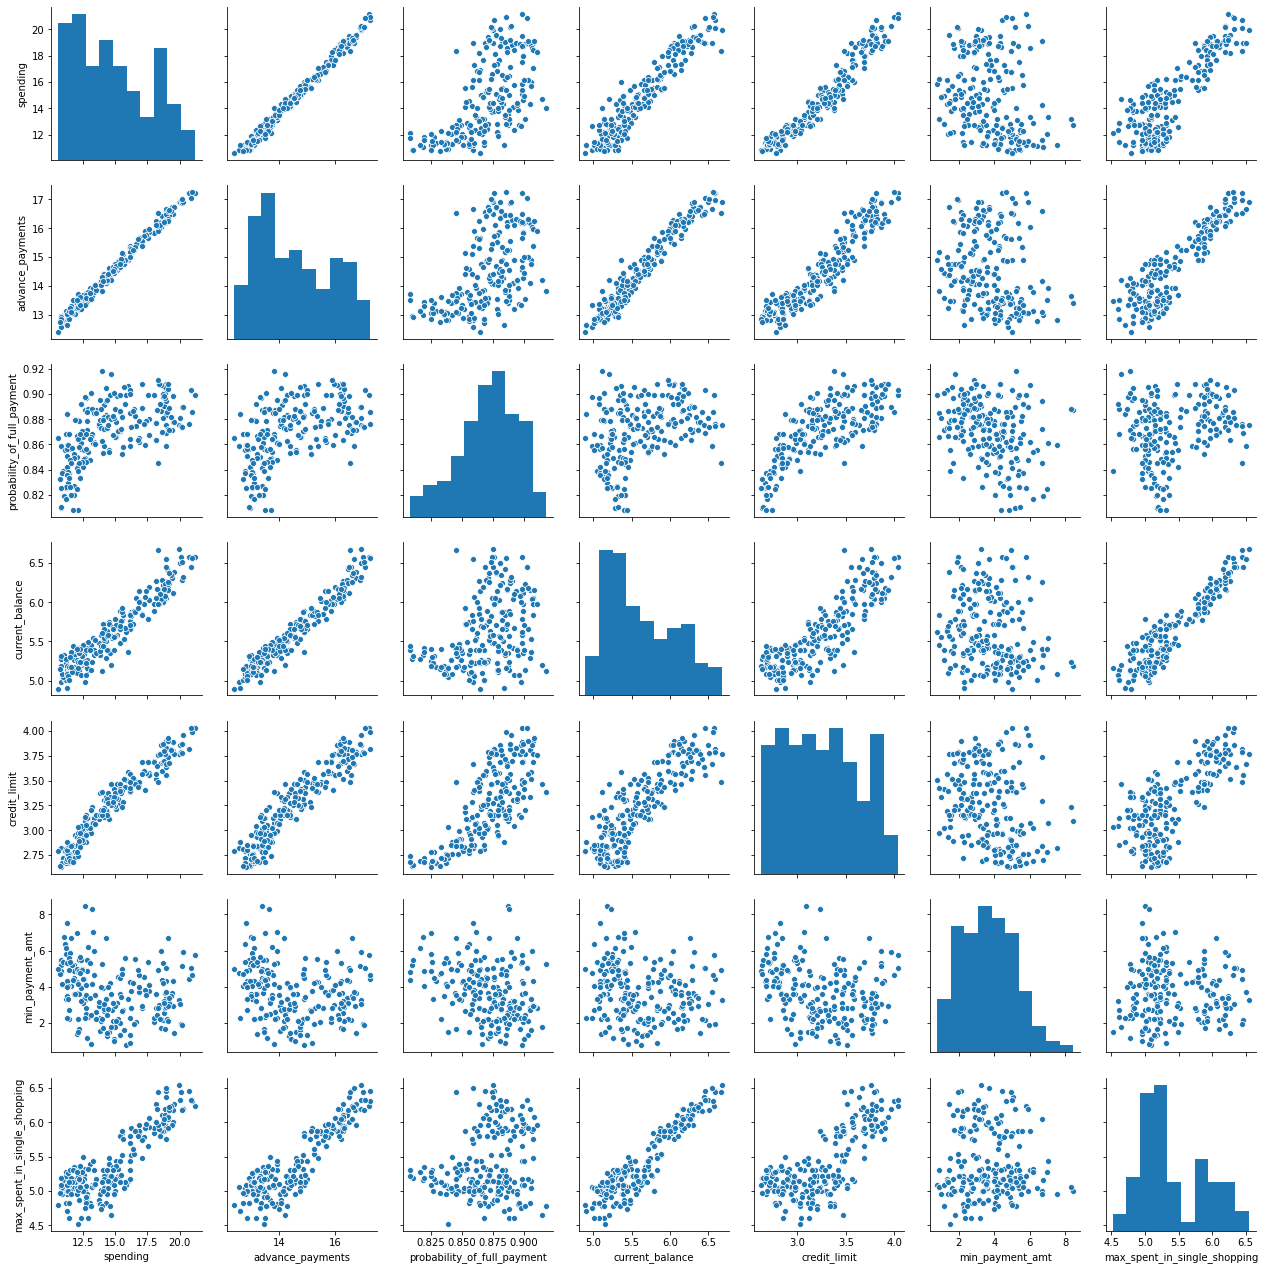

In [19]:
sns.pairplot(df)

In [20]:
df.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


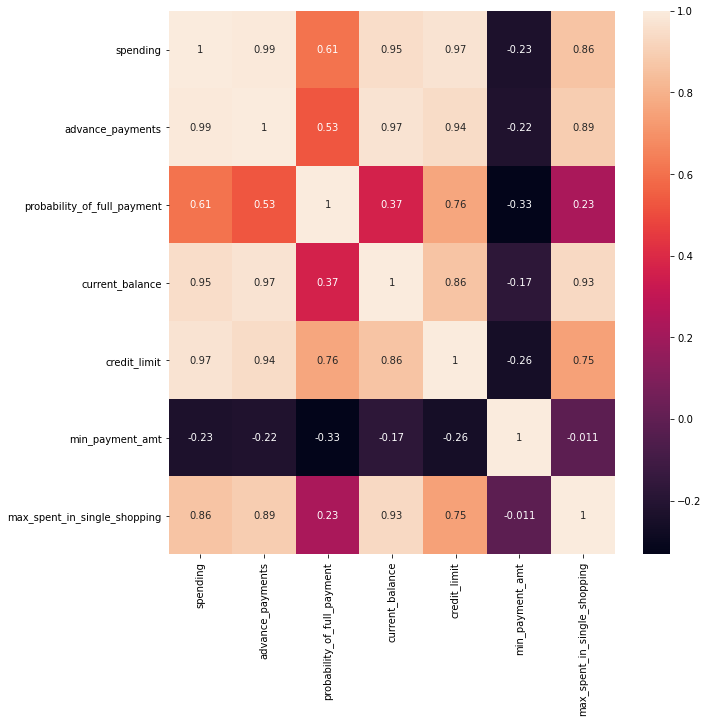

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

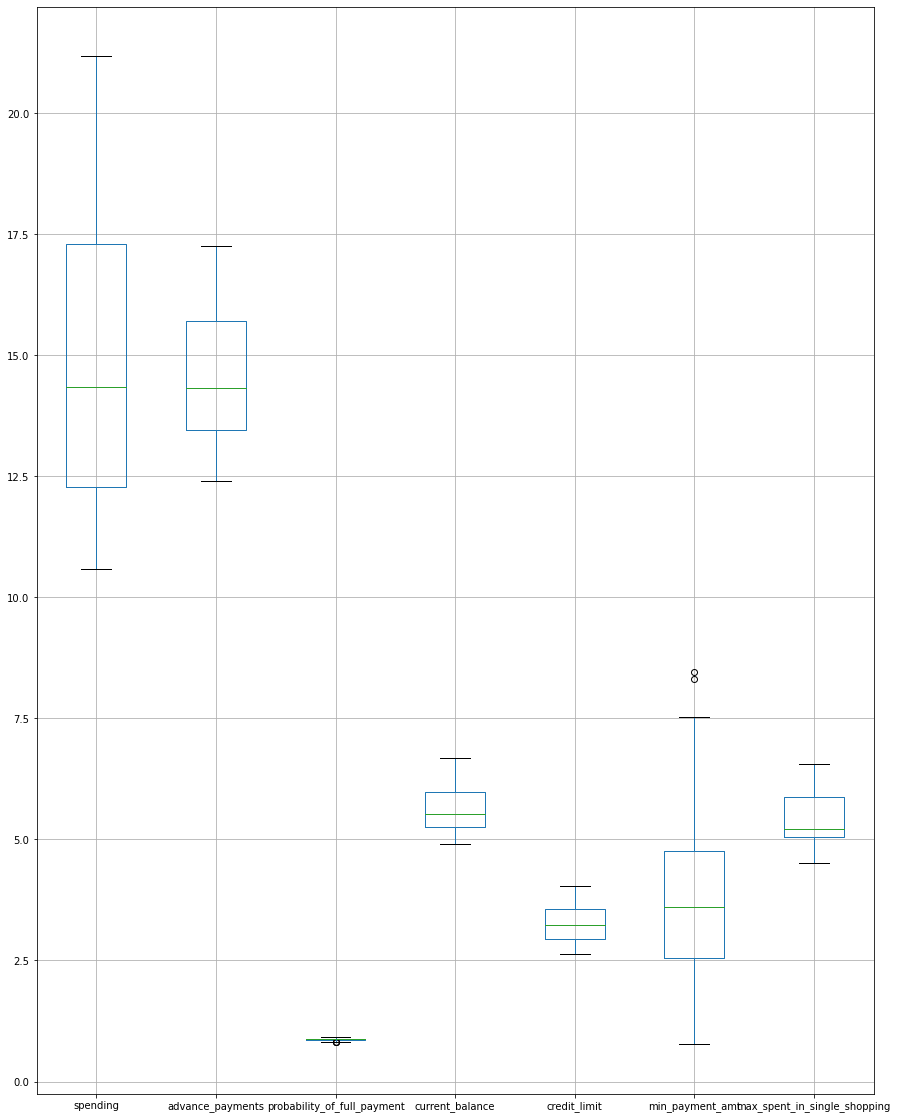

In [22]:
plt.subplots(figsize=(15,20))
df.boxplot(figsize=(20,30))

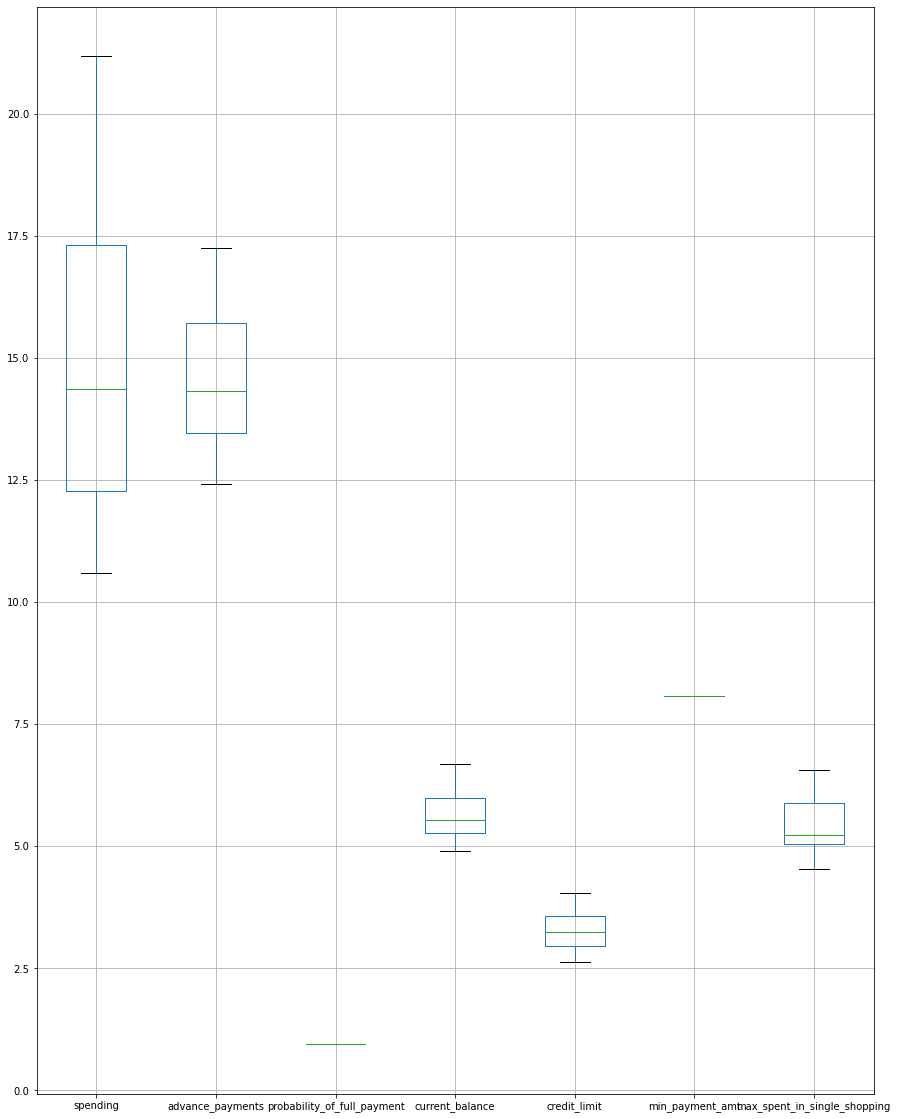

In [13]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

lapps,uapps=remove_outlier(df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']>lapps,uapps,df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']<lapps,uapps,df['probability_of_full_payment'])

lapp,uapp=remove_outlier(df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']>lapp,uapp,df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']<lapp,uapp,df['min_payment_amt'])

plt.subplots(figsize=(15,20))
df.boxplot(figsize=(20,30))

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
X = StandardScaler()
scaled_df = X.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, index=df.index, columns=df.columns)
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


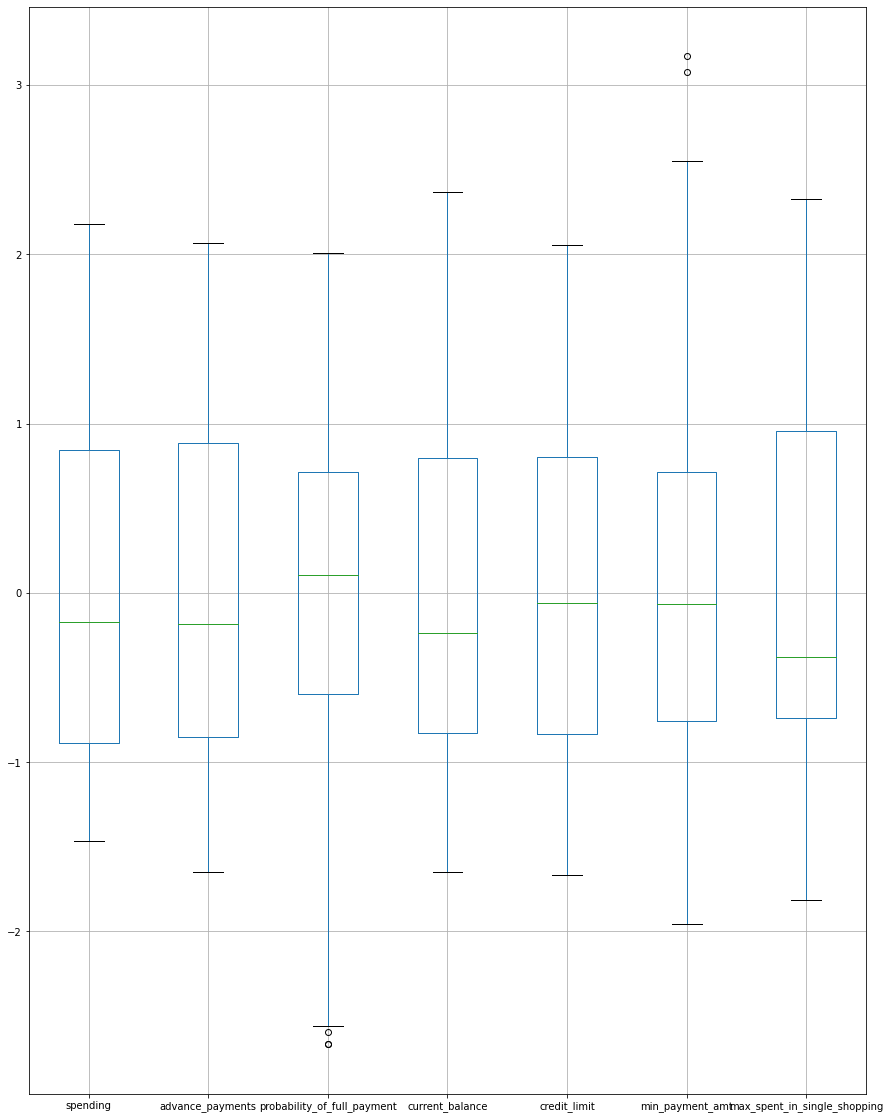

In [23]:
plt.subplots(figsize=(15,20))
scaled_df.boxplot(figsize=(20,30))

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [25]:
ward_link = linkage(scaled_df, method = 'ward')

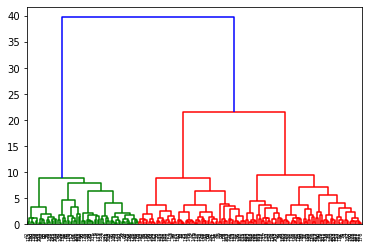

In [26]:
dend2 = dendrogram(ward_link)

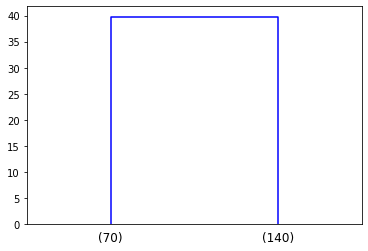

In [27]:
dend = dendrogram(ward_link,
                 truncate_mode='lastp',
                 p = 2,
                 )

In [28]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(ward_link, 2, criterion='maxclust')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [29]:
df['clusters'] = clusters

In [30]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [31]:
df.clusters.value_counts().sort_index()

1     70
2    140
Name: clusters, dtype: int64

In [32]:
aggdata=df.groupby('clusters').mean()
aggdata['Freq']=df.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,13.085571,13.766214,0.864298,5.363714,3.045593,3.730723,5.103421,140


# K-MEANS Clustering

In [33]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [34]:
k_means.inertia_

659.171754487041

In [35]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

430.6589731513006

In [36]:
wss =[] 

In [37]:
for i in range(1,15):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [38]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.2941183362073,
 328.9890900141916,
 288.6617710230695,
 262.66219886534304,
 240.42026123854407,
 220.97776142956482,
 208.02945179399117,
 194.13990026444782,
 182.5030002221504,
 174.62194418677183,
 164.7710156233856]

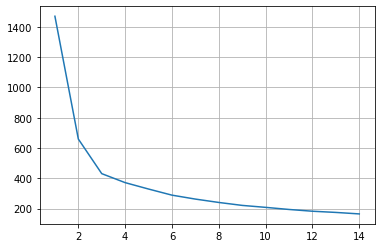

In [39]:
plt.plot(range(1,15), wss)
plt.grid()
plt.show()

In [40]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)
labels = k_means.labels_
labels

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [41]:
k_means3 = KMeans(n_clusters = 3)
k_means3.fit(scaled_df)
labels_3 = k_means3.labels_
labels_3

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

In [42]:
k_means4 = KMeans(n_clusters = 4)
k_means4.fit(scaled_df)
labels_4 = k_means4.labels_
labels_4

array([3, 1, 3, 2, 3, 2, 2, 1, 3, 2, 3, 1, 2, 3, 1, 2, 1, 2, 1, 2, 2, 2,
       3, 2, 1, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 3, 3, 1, 0, 3,
       2, 2, 1, 3, 3, 3, 2, 3, 3, 3, 3, 0, 2, 2, 2, 3, 1, 2, 2, 0, 1, 3,
       3, 1, 3, 1, 1, 2, 3, 3, 2, 3, 1, 2, 0, 1, 1, 1, 1, 3, 2, 0, 0, 0,
       0, 2, 1, 3, 1, 2, 1, 3, 3, 0, 2, 0, 1, 3, 0, 3, 1, 3, 3, 2, 1, 3,
       0, 1, 3, 2, 2, 0, 1, 1, 2, 3, 1, 2, 2, 2, 1, 1, 3, 2, 1, 1, 2, 1,
       1, 3, 2, 3, 3, 2, 0, 1, 0, 1, 2, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 0,
       1, 1, 1, 2, 1, 0, 3, 2, 3, 0, 3, 2, 0, 1, 1, 2, 1, 2, 1, 3, 3, 3,
       1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2, 3, 1, 0, 3, 2,
       3, 2, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0])

In [43]:
df_Kmeans = df.drop('clusters',axis=1)

In [44]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [45]:
silhouette_score(df_Kmeans,labels)

0.5219502641209951

In [46]:
silhouette_samples(df_Kmeans,labels).min()

-0.16588626438884496

In [47]:
silhouette_score(df_Kmeans,labels_3)

0.4506120960157481

In [48]:
silhouette_samples(df_Kmeans,labels_3).min()

-0.27080643521544373

In [49]:
silhouette_score(df_Kmeans,labels_4)

0.370077389410337

In [50]:
silhouette_samples(df_Kmeans,labels_4).min()

-0.44498875233848495

In [51]:
df_Kmeans['Kmeans_clusters'] = labels

In [52]:
df_Kmeans.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Kmeans_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [53]:
df_Kmeans.Kmeans_clusters.value_counts().sort_index()

0    133
1     77
Name: Kmeans_clusters, dtype: int64

In [54]:
agdata=df_Kmeans.groupby('Kmeans_clusters').mean()
agdata['Freq']=df_Kmeans.Kmeans_clusters.value_counts().sort_index()
agdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Kmeans_clusters,,,,,,,,
0,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737,133
1,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740,77


# Problem 2

In [148]:
dg=pd.read_csv('insurance_part2_data.csv') 

In [149]:
dg.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [150]:
dg.describe(include="all")

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [151]:
dg.isna().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [152]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [153]:
dg.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [154]:
dg.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [155]:
for column in dg[['Agency_Code','Type', 'Claimed', 'Channel', 'Product Name', 'Destination']]:
    print(column.upper(),': ',dg[column].nunique())
    print(dg[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




In [156]:
for feature in dg.columns: 
    if dg[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(dg[feature].unique()))
        print(pd.Categorical(dg[feature].unique()).codes)
        dg[feature] = pd.Categorical(dg[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [157]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [158]:
dg.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


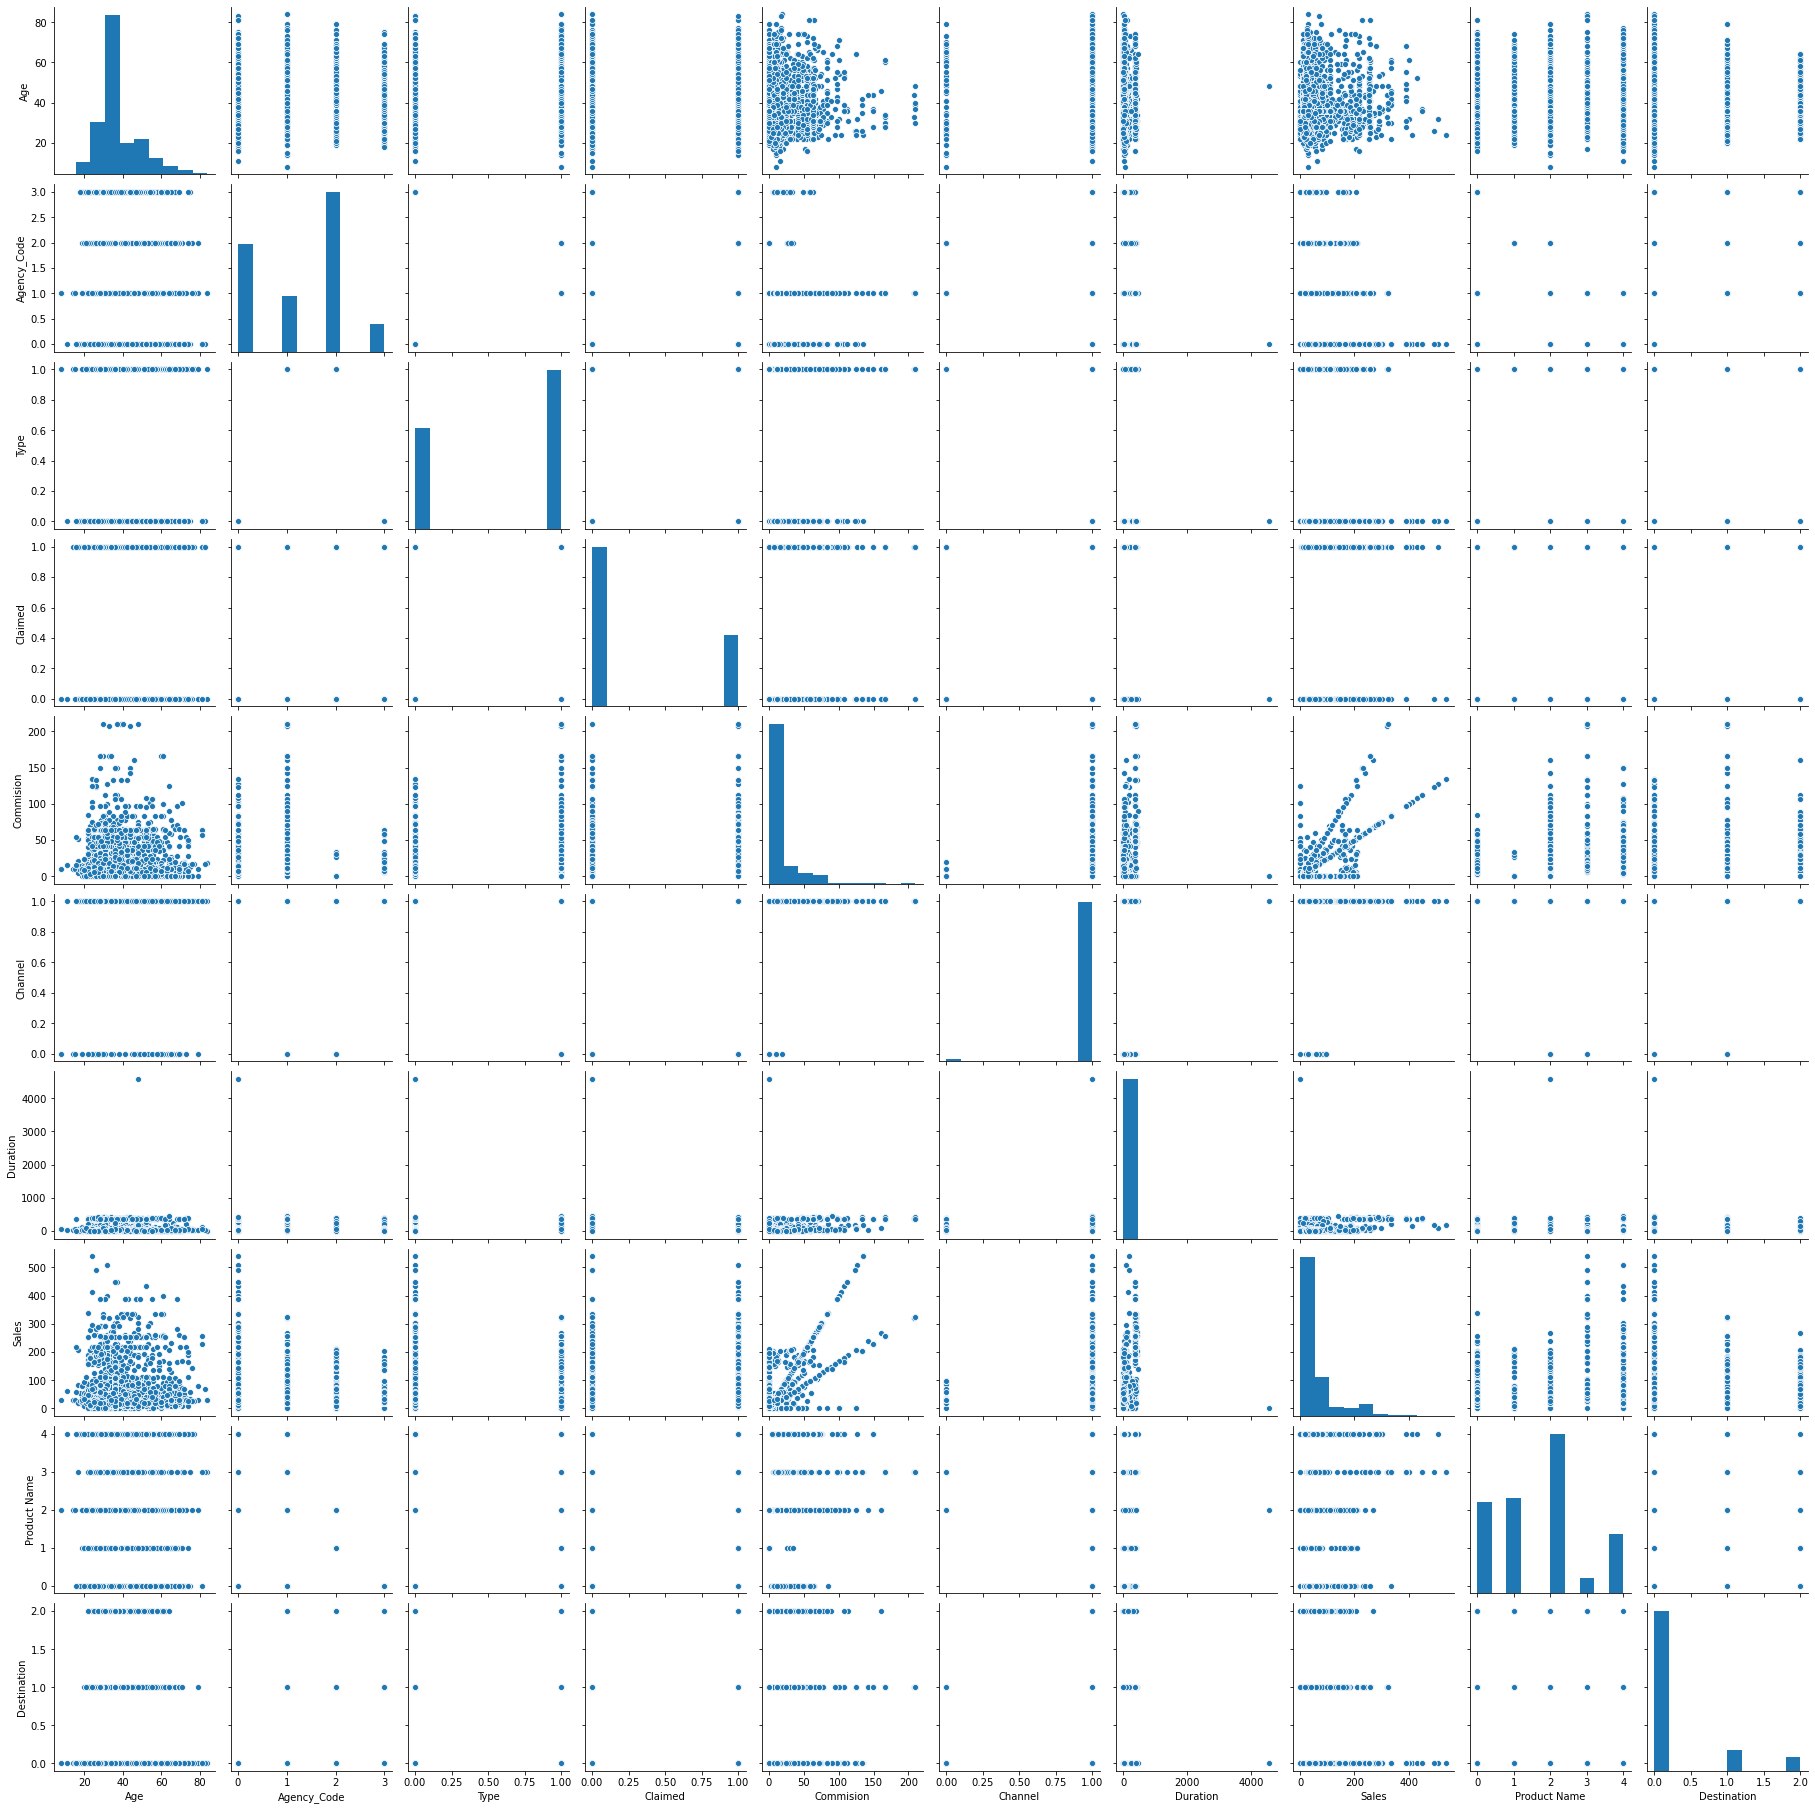

In [159]:
sns.pairplot(dg)

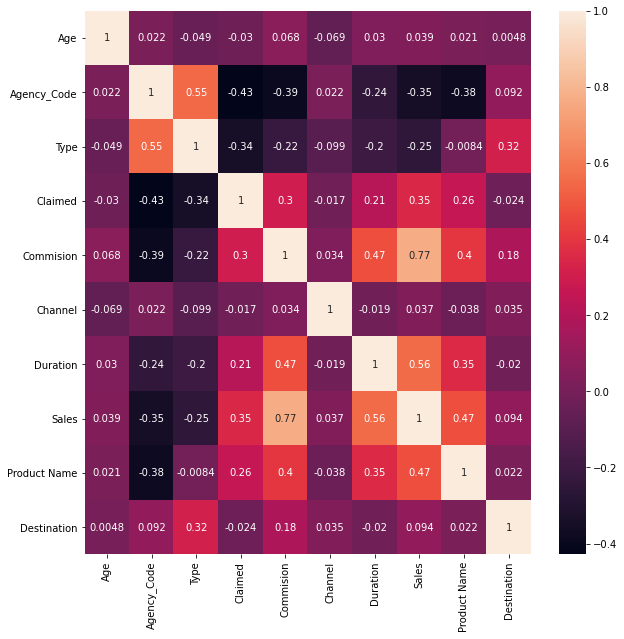

In [160]:
plt.figure(figsize=(10,10))
sns.heatmap(dg.corr(), annot=True)

In [616]:
dg.skew(axis = 0, skipna = True) 

Age              1.149713
Agency_Code     -0.155126
Type            -0.461352
Commision        3.148858
Channel         -7.892734
Duration        13.784681
Sales            2.381148
Product Name     0.432670
Destination      2.188556
dtype: float64

In [162]:
dups = dg.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
dg[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,0,0,1,15.0,1,27,60.0,0,0
329,36,2,1,0,0.0,1,5,20.0,2,0
407,36,2,1,0,0.0,1,11,19.0,1,0
411,35,2,1,0,0.0,1,2,20.0,2,0
422,36,2,1,0,0.0,1,5,20.0,2,0
...,...,...,...,...,...,...,...,...,...,...
2940,36,2,1,0,0.0,1,8,10.0,1,0
2947,36,2,1,0,0.0,1,10,28.0,2,0
2952,36,2,1,0,0.0,1,2,10.0,1,0
2962,36,2,1,0,0.0,1,4,20.0,2,0


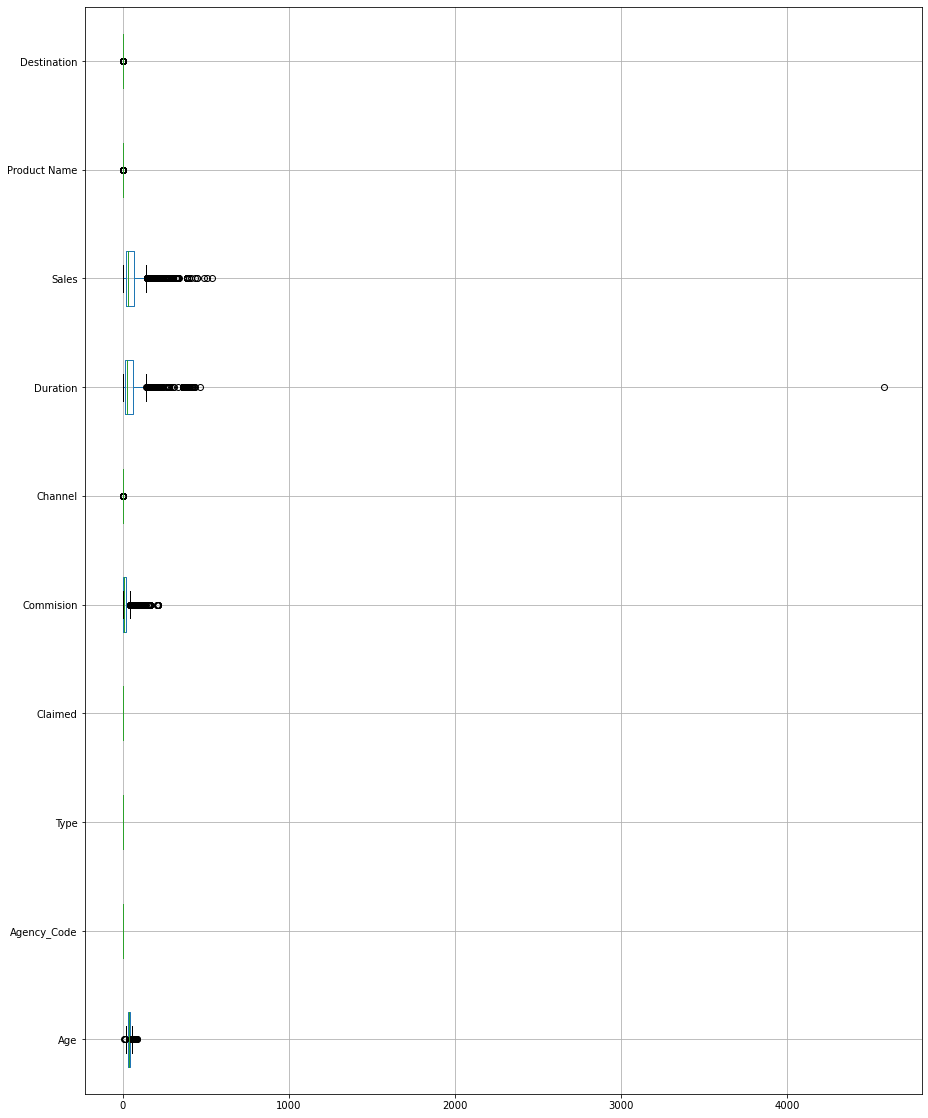

In [163]:
plt.subplots(figsize=(15,20))
dg.boxplot(figsize=(20,30), vert=0)

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

lag,uag=remove_outlier(dg['Age'])
dg['Age']=np.where(dg['Age']>lag,uag,dg['Age'])
dg['Age']=np.where(dg['Age']<lag,uag,dg['Age'])

lac,uac=remove_outlier(dg['Commision'])
dg['Commision']=np.where(dg['Commision']>lac,uac,dg['Commision'])
dg['Commision']=np.where(dg['Commision']<lac,uac,dg['Commision'])

lad,uad=remove_outlier(dg['Duration'])
dg['Duration']=np.where(dg['Duration']>lad,uad,dg['Duration'])
dg['Duration']=np.where(dg['Duration']<lad,uad,dg['Duration'])

las,uas=remove_outlier(dg['Sales'])
dg['Sales']=np.where(dg['Sales']>las,uas,dg['Sales'])
dg['Sales']=np.where(dg['Sales']<las,uas,dg['Sales'])

plt.subplots(figsize=(15,20))
dg.boxplot(figsize=(20,30))

In [164]:
dg.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

In [165]:
X = dg.drop(["Claimed", "Agency_Code"], axis=1)

y = dg.pop("Claimed")

X.head()

,Age,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0.70,1,7,2.51,2,0
1,36,1,0.00,1,34,20.00,2,0
2,39,1,5.94,1,3,9.90,2,1
3,36,1,0.00,1,4,26.00,1,0
4,33,0,6.30,1,53,18.00,0,0


In [605]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [606]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 8)
X_test (900, 8)
train_labels (2100,)
test_labels (900,)


# CART

In [448]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [7], #10
    'min_samples_leaf': [30], #30, 50
    'min_samples_split': [100],#50, 150
}

dtcl = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 5)

In [449]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 30, 'min_samples_split': 100}


DecisionTreeClassifier(max_depth=7, min_samples_leaf=30, min_samples_split=100)

In [450]:
train_char_label = ['no', 'yes']
tree_reg = open('tree_reg.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_reg , feature_names = list(X_train), class_names = list(train_char_label))

tree_reg.close()
dot_data

http://webgraphviz.com/

In [451]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Product Name  0.535950
Commision     0.250343
Sales         0.160026
Duration      0.019723
Age           0.014486
Type          0.010070
Destination   0.009403
Channel       0.000000


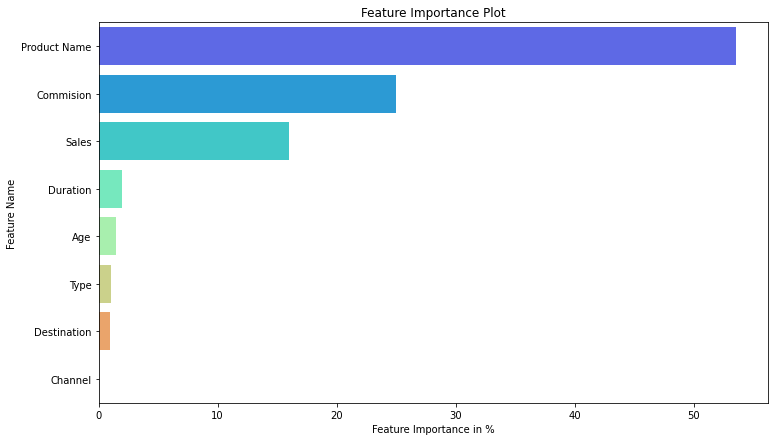

In [452]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [453]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [454]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.657895,0.342105
1,0.476190,0.523810
2,0.622222,0.377778
3,0.363636,0.636364
4,0.987179,0.012821


AUC: 0.844


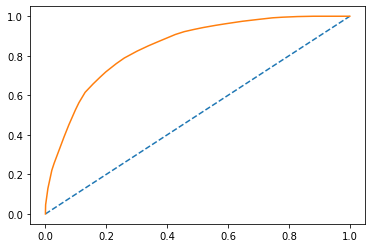

In [458]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.815


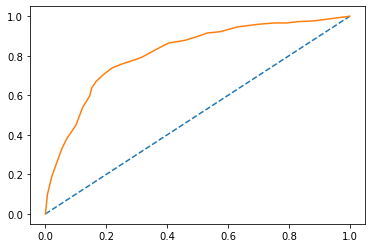

In [460]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

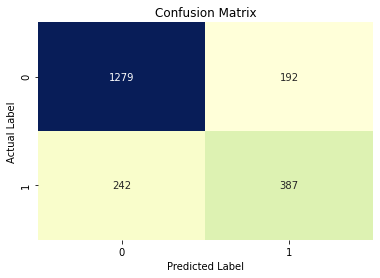

In [461]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [462]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1471
           1       0.67      0.62      0.64       629

    accuracy                           0.79      2100
   macro avg       0.75      0.74      0.75      2100
weighted avg       0.79      0.79      0.79      2100



In [463]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][0],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.67
cart_train_recall  0.62
cart_train_f1  0.64


In [464]:
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7933333333333333

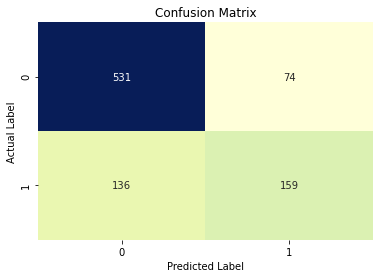

In [465]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [468]:
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7666666666666667

In [469]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       605
           1       0.68      0.54      0.60       295

    accuracy                           0.77       900
   macro avg       0.74      0.71      0.72       900
weighted avg       0.76      0.77      0.76       900



In [470]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_test_precision)
print ('cart_train_recall ',cart_test_recall)
print ('cart_train_f1 ',cart_test_f1)

cart_train_precision  0.68
cart_train_recall  0.54
cart_train_f1  0.6


# Random Forest

In [607]:
param_grid = {
    'max_depth': [10, 15, 30], 
    'max_features': [3, 5, 6], 
    'min_samples_leaf': [2, 5, 7],
    'min_samples_split': [15, 30, 50],
    'n_estimators': [100, 300, 500]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [608]:
grid_search.fit(X_train, train_labels)

KeyboardInterrupt: 

In [585]:
grid_search.best_params_

{'max_depth': 15,
 'max_features': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 30,
 'n_estimators': 300}

In [586]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=15, max_features=5, min_samples_leaf=2,
                       min_samples_split=30, n_estimators=300)

In [587]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

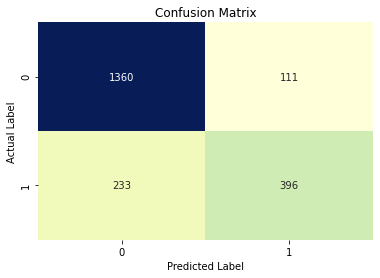

In [588]:
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [609]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8361904761904762

In [590]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1471
           1       0.78      0.63      0.70       629

    accuracy                           0.84      2100
   macro avg       0.82      0.78      0.79      2100
weighted avg       0.83      0.84      0.83      2100



In [591]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.78
rf_train_recall  0.63
rf_train_f1  0.7


Area under Curve is 0.7770559378509152


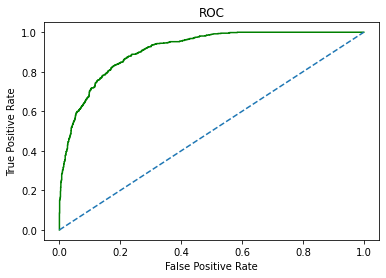

In [592]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', rf_train_auc)

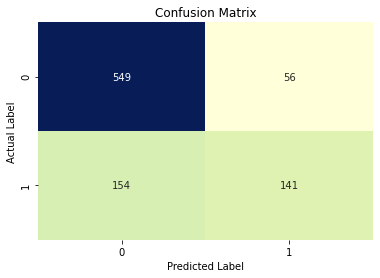

In [593]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [594]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7666666666666667

In [595]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.72      0.48      0.57       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.71       900
weighted avg       0.76      0.77      0.75       900



In [596]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.72
rf_test_recall  0.48
rf_test_f1  0.57


Area under Curve is 0.6927020591119204


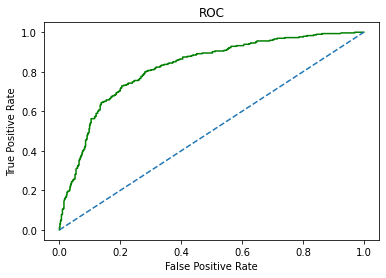

In [597]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', rf_test_auc)

# Neural Network

In [610]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [611]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 8)
X_test (900, 8)
train_labels (2100,)
test_labels (900,)


In [621]:
param_grid = {
    'hidden_layer_sizes': [50,100, 200],
    'max_iter': [5000, 7000, 10000], 
    'solver': ['adam', 'sgd'], 
    'tol': [0.01],
}

nncl = MLPClassifier()

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [622]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_

{'hidden_layer_sizes': 200, 'max_iter': 7000, 'solver': 'adam', 'tol': 0.01}

In [623]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=200, max_iter=7000, tol=0.01)

In [624]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

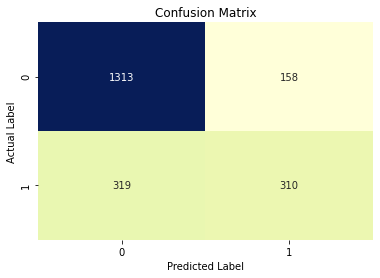

In [625]:
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [626]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1471
           1       0.66      0.49      0.57       629

    accuracy                           0.77      2100
   macro avg       0.73      0.69      0.71      2100
weighted avg       0.76      0.77      0.76      2100



In [627]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.66
nn_train_recall  0.49
nn_train_f1  0.57


In [628]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7728571428571429

Area under Curve is 0.6927179308712479


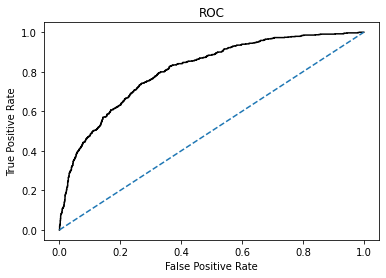

In [629]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', nn_train_auc)

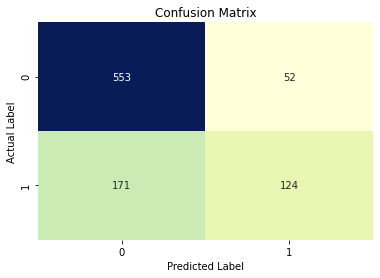

In [630]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [631]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7522222222222222

In [632]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       605
           1       0.70      0.42      0.53       295

    accuracy                           0.75       900
   macro avg       0.73      0.67      0.68       900
weighted avg       0.74      0.75      0.73       900



In [633]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.7
nn_test_recall  0.42
nn_test_f1  0.53


Area under Curve is 0.6671942849138536


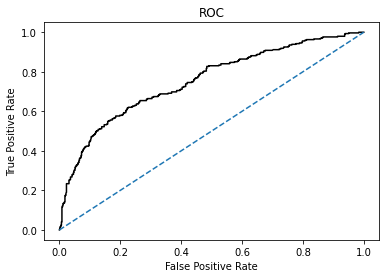

In [634]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', nn_test_auc)

In [637]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.77,0.84,0.77,0.77,0.75
AUC,0.84,0.81,0.78,0.69,0.69,0.67
Recall,0.62,0.54,0.63,0.48,0.49,0.42
Precision,0.67,0.68,0.78,0.72,0.66,0.70
F1 Score,0.64,0.60,0.70,0.57,0.57,0.53


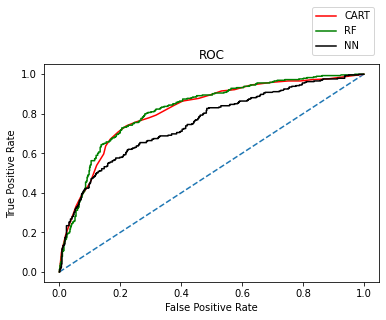

In [636]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')